# Birthday paradox

**Problem 1a.** During exercise session, we showed that for $d$ equally likely dates in a year and $n$ people, the probability of a repeat date is $p(n)=1-\frac{d^\underline{n}}{d^n}$. We also derived a simple approximate formula for this probability: $p_a(n) = 1-e^{-\frac{n(n-1)}{2d}}$. In particular, this approximation implies that for $d=365$ dates, $p(n)$ is close to $\frac{1}{2}$ for $n=23$.

Verify how good the approximation is. To this end, write a program that computes the exact value of $p(n)$ as well as the value of the approximation $p_a(n)$ for $d=365$ and $n=1,\ldots,60$. Plot the graphs of the two functions.

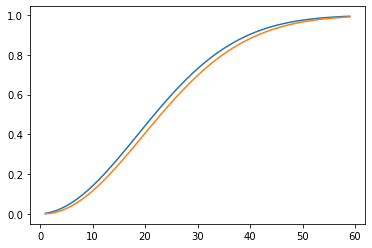

In [36]:
import numpy as np
import matplotlib.pyplot as plt

d = 365
def p(n):
    global d
    tmp = [(d - x)/d for x in range(0, n + 1)]
    return 1 - np.prod(tmp)

def pa(n):
    global d
    tmp = n*(n-1)/(2*d)
    return 1 - np.exp(-tmp)

x = [p(i) for i in range(1, 60)]
y = [pa(i) for i in range(1, 60)]
z = [i for i in range(1,60)]

plt.plot(z, x)
plt.plot(z, y)

**Problem 1b.**
Implement a function, that chooses random dates out of $1,\ldots,d$ until a repeat occurs. The function should return the number of the step in which that happened. Run the function $N=100\,000$ times. 
    * Plot a histogram of the return values.
    * Which return value seems most likely? 
    * What is the average of the return values?
    * Is there any simple relation between these two numbers and the value $23$ in the previous problem?
    * Is there any simple relation between the histogram obtained, and the plot in the previous problem?

23.539105391053912
17


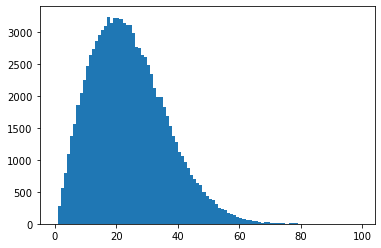

In [1]:
import random as rnd
import numpy as np
import matplotlib.pyplot as plt

d = 365
def r():
    global d
    tab = [0]*d
    counter = 0
    index = rnd.randrange(1,d)
    while tab[index] == 0:
        tab[index] = 1
        counter += 1
        index = rnd.randrange(1,d)
    return counter

tmp = [r() for x in range(1, 100000)]
plt.hist(tmp, bins = range(100))
print(np.average(tmp))
counts = np.bincount(tmp)
print(np.argmax(counts))

**Problem 1c.** Here we investigate how our analysis using the classical approach compares to a more empirical one. The file *us_births_69_88.csv* contains the counts for birthdates from 1969 to 1988. Only those births, for which the full date is known, are included in the file.
    * Read the file.
    * Investigate the data. Do you notice anything strange?
    * Plot a heatmap of the data. Do you notice any significant deviations from the uniform assumption? Can you explain them?
    * Implement a sampling function as in 1b, but this time using the supplied data. Compare the results.

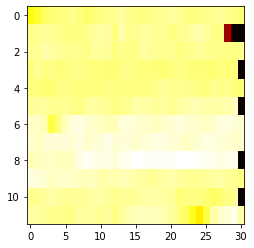

In [36]:
import csv
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

data = pd.read_csv('us_births_69_88.csv')

tmp = data['births'].values
tmp2 = np.reshape(tmp, (12,31))

plt.imshow(tmp2,cmap='hot',interpolation='nearest', aspect=31/12)

In [ ]:
cumsum
searchsorted